### 📚 01. 앙상블 기초 복습

---

### ✅ 앙상블 학습이란?

여러 개의 \*\*약한 모델(weak learner)\*\*을 모아
더 \*\*강력한 모델(strong learner)\*\*을 만드는 머신러닝 기법입니다.

> **대표 기법**
>
> * `Bagging` : 모델을 병렬로 학습시켜 예측을 평균
> * `Boosting` : 모델을 순차적으로 학습시켜 성능을 점점 개선
> * `Stacking` : 여러 모델의 예측을 또 다른 모델에 넣어 학습

---

### 🎯 대표 앙상블 기법 요약

| 기법명          | 핵심 아이디어                       | 대표 모델                       |
| ------------ | ----------------------------- | --------------------------- |
| **Bagging**  | 여러 모델을 **병렬로 학습**, 예측을 **평균** | 랜덤포레스트(Random Forest)       |
| **Boosting** | 이전 모델의 오류를 **순차적으로 보완**       | GradientBoosting, XGBoost 등 |
| **Stacking** | 여러 모델의 예측값을 **메타모델에 입력**      | 다양한 조합 가능                   |

===

## 🤖 앙상블 기법 비교 실습: Bagging vs Boosting

이 실습에서는 대표적인 앙상블 학습 기법인 **Bagging(Random Forest)** 과  
**Boosting(Gradient Boosting)** 을 비교해볼 거예요.

### 🧩 실험 시나리오

- 동일한 데이터셋(`make_classification`) 사용
- 같은 훈련/테스트 데이터
- 같은 모델 수(`n_estimators=100`)
- 다른 학습 방식 → 병렬 vs 순차

### 🎯 비교 포인트

| 항목        | Bagging                              | Boosting                                |
|-------------|--------------------------------------|------------------------------------------|
| 학습 방식   | 병렬 학습 (모델들을 동시에 학습)        | 순차 학습 (앞 모델 오류를 보완하며 학습)     |
| 대표 모델   | 랜덤포레스트(RandomForest)           | 그레이디언트 부스팅(GradientBoosting)     |
| 중점       | 분산 감소 → 과적합 방지                | 편향 감소 → 성능 점진적 향상              |



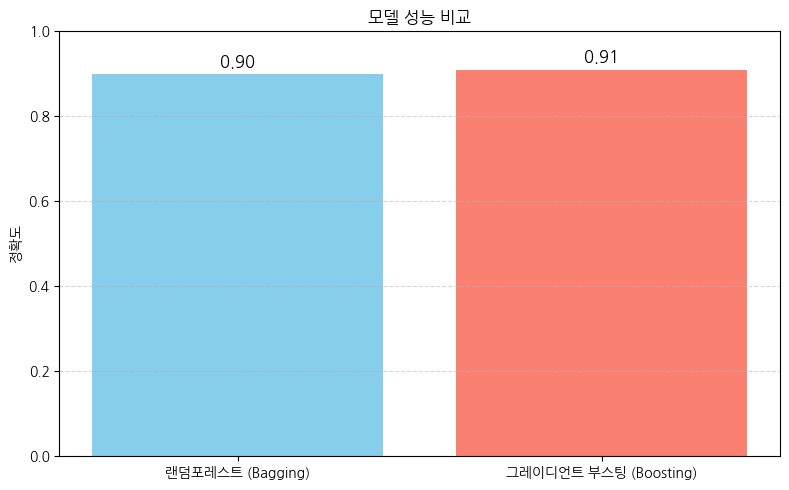

In [1]:
# ------------------------- [필요한 라이브러리] -------------------------
import matplotlib.pyplot as plt  # 그래프 그리기용 라이브러리
import matplotlib.font_manager as fm  # 폰트 관련 설정
import platform  # 운영체제 확인용
from sklearn.datasets import make_classification  # 가상 데이터 생성
from sklearn.model_selection import train_test_split  # 훈련/테스트 데이터 분할
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # 앙상블 모델들
from sklearn.metrics import accuracy_score  # 모델 정확도 평가 함수

# ------------------------- [폰트 설정 - 한글 & 이모지] -------------------------
# 운영체제별로 한글 폰트 설정 (Linux에서는 NanumGothic 사용)
if platform.system() == 'Linux':
    plt.rcParams['font.family'] = 'NanumGothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스(-)가 깨지지 않게 설정
plt.rcParams['axes.unicode_minus'] = False

# ------------------------- [데이터 생성 & 분할] -------------------------
# 총 1000개의 샘플, 20개의 특성을 가진 이진 분류용 가상 데이터 생성
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# 데이터를 훈련(80%)과 테스트(20%)로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------- [1. Bagging - 랜덤포레스트] -------------------------
# 랜덤포레스트 모델 정의 (100개의 결정트리, 랜덤성 고정)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 훈련 데이터로 모델 학습
rf.fit(X_train, y_train)

# 테스트 데이터 예측
rf_pred = rf.predict(X_test)

# 정확도 계산
rf_acc = accuracy_score(y_test, rf_pred)

# ------------------------- [2. Boosting - Gradient Boosting] -------------------------
# GradientBoosting 모델 정의 (100개의 약한 모델 순차 학습)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# 모델 학습
gb.fit(X_train, y_train)

# 예측 수행
gb_pred = gb.predict(X_test)

# 정확도 측정
gb_acc = accuracy_score(y_test, gb_pred)

# ------------------------- [성능 비교 시각화] -------------------------
# 모델 이름과 정확도 리스트 만들기
models = ['랜덤포레스트 (Bagging)', '그레이디언트 부스팅 (Boosting)']
scores = [rf_acc, gb_acc]

# 막대 그래프 시각화
plt.figure(figsize=(8, 5))
bars = plt.bar(models, scores, color=['skyblue', 'salmon'])
plt.title("모델 성능 비교")  # 타이틀 (이모지 없이 한글로 깔끔하게)
plt.ylabel("정확도")
plt.ylim(0, 1)  # y축 범위 설정

# 바 위에 정확도 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}',
             ha='center', va='bottom', fontsize=12)

# y축에 그리드 선 추가
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
